<h3><u><center> Defining Problem Statement and Analysing basic metrics </center></u></h3>
<ul>
    <li> The Management team at Walmart Inc. wants to analyze the customer purchase behavior against multiple factors </li>
    <li> We need to answer business questions with a certain confidence level which will help Walmart make its decisions</li>
</ul>

<b> Dataset Notes: </b>
<ul>
    <li>Age is given in bins</li>
    <li>Marital Status => 0 corresponds to unmarried, 1 corresponds to married</li>
    <li>Product category is given in integers instead of string as it is masked for privacy</li>
</ul>

In [4]:
# Loading all necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
import warnings # to supress any warnings coming out
warnings.filterwarnings("ignore")

In [5]:
walmart = pd.read_csv("walmart_data.csv")
walmart.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [6]:
walmart.shape

(550068, 10)

In [7]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#### <u>Converting datatype of certain columns to categorical type</u>

In [8]:
walmart['Gender'] = walmart.Gender.astype('category')
walmart['Age'] = walmart.Age.astype('category')
walmart['Occupation'] = walmart.Occupation.astype('category')
walmart['City_Category'] = walmart.City_Category.astype('category')
walmart['Stay_In_Current_City_Years'] = walmart.Stay_In_Current_City_Years.astype('category')
walmart['Marital_Status'] = walmart.Marital_Status.astype('category')
walmart['Product_Category'] = walmart.Product_Category.astype('category')

In [9]:
walmart.dtypes

User_ID                          int64
Product_ID                      object
Gender                        category
Age                           category
Occupation                    category
City_Category                 category
Stay_In_Current_City_Years    category
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

In [10]:
walmart.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [11]:
walmart.describe(include = "category").T

,count,unique,top,freq
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


#### <u> Missing, Duplicate Values </u>

In [12]:
walmart.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [13]:
walmart.loc[walmart.duplicated() == True,:].sum()
# No duplicate rows

User_ID       0.0
Product_ID    0.0
Purchase      0.0
dtype: float64

#### <u>Value counts for categorial (discrete) variables</u>

In [14]:
print(walmart["Gender"].value_counts())
print("\n",walmart["Gender"].value_counts(normalize = True))

M    414259
F    135809
Name: Gender, dtype: int64

 M    0.753105
F    0.246895
Name: Gender, dtype: float64


In [15]:
print(walmart["Age"].value_counts(sort=False))
print("\n",round(walmart["Age"].value_counts(normalize = True), 2))

0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64

 26-35    0.40
36-45    0.20
18-25    0.18
46-50    0.08
51-55    0.07
55+      0.04
0-17     0.03
Name: Age, dtype: float64


In [16]:
print(walmart["Occupation"].value_counts(sort = False))
print("\n",walmart["Occupation"].value_counts(normalize = True).round(3))

0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64

 4     0.131
0     0.127
7     0.108
1     0.086
17    0.073
20    0.061
12    0.057
14    0.050
2     0.048
16    0.046
6     0.037
3     0.032
10    0.024
5     0.022
15    0.022
11    0.021
19    0.015
13    0.014
18    0.012
9     0.011
8     0.003
Name: Occupation, dtype: float64


In [17]:
print(walmart["City_Category"].value_counts(sort = False))
print("\n",walmart["City_Category"].value_counts(normalize = True).round(3))

A    147720
B    231173
C    171175
Name: City_Category, dtype: int64

 B    0.420
C    0.311
A    0.269
Name: City_Category, dtype: float64


In [18]:
print(walmart["Stay_In_Current_City_Years"].value_counts(sort = False))
print("\n",walmart["Stay_In_Current_City_Years"].value_counts(normalize = True).round(3))

0      74398
1     193821
2     101838
3      95285
4+     84726
Name: Stay_In_Current_City_Years, dtype: int64

 1     0.352
2     0.185
3     0.173
4+    0.154
0     0.135
Name: Stay_In_Current_City_Years, dtype: float64


In [19]:
walmart['Marital_Status'].replace({1: 'Married', 0: 'Single'}, inplace = True)
print(walmart["Marital_Status"].value_counts(sort = False))
print("\n",walmart["Marital_Status"].value_counts(normalize = True).round(3))

Single     324731
Married    225337
Name: Marital_Status, dtype: int64

 Single     0.59
Married    0.41
Name: Marital_Status, dtype: float64


In [20]:
print(walmart["Product_Category"].value_counts(sort = False))
print("\n",walmart["Product_Category"].value_counts(normalize = True).round(3))

1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        410
10      5125
11     24287
12      3947
13      5549
14      1523
15      6290
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

 5     0.274
1     0.255
8     0.207
11    0.044
2     0.043
6     0.037
3     0.037
4     0.021
16    0.018
15    0.011
13    0.010
10    0.009
12    0.007
7     0.007
18    0.006
20    0.005
19    0.003
14    0.003
17    0.001
9     0.001
Name: Product_Category, dtype: float64


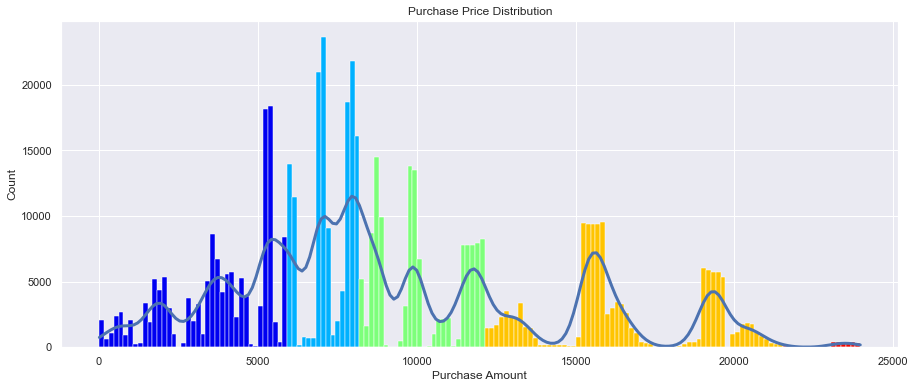

In [41]:
axs = sns.histplot(x = walmart["Purchase"], kde = True, line_kws={'color': "black", 'lw': 3, 'ls': '-'}) 
sns.set(rc={'figure.figsize':(15, 6)})

cmap = plt.get_cmap('jet')
lowest = cmap(0.1)
lower = cmap(0.3)
higher =cmap(0.5)
highest = cmap(0.7)
outlier = cmap(0.9)

quant_25 = np.quantile(walmart["Purchase"], 0.25)
quant_50 = np.quantile(walmart["Purchase"], 0.50)
quant_75 = np.quantile(walmart["Purchase"], 0.75)
IQR = quant_75 - quant_25

for p in axs.patches:
    x, w, h = p.get_x(), p.get_width(), p.get_height()
    if ((x <= quant_25 - (1.5*IQR)) or (x >= quant_75 + (1.5*IQR))):
        p.set_facecolor(outlier)
    elif x <= quant_25:
        p.set_facecolor(lowest)
    elif x > quant_25 and x <= quant_50:
        p.set_facecolor(lower)
    elif x > quant_50 and x <= quant_75:
        p.set_facecolor(higher)
    else:
        p.set_facecolor(highest)

axs.set(title = "Purchase Price Distribution", xlabel = "Purchase Amount")
plt.show()

In [42]:
num_out = len(walmart[(walmart["Purchase"] <= quant_25 - (1.5*IQR)) | (walmart["Purchase"] >= quant_75 + (1.5*IQR))])
print("Num of outliers:", num_out)
print("% of total:", num_out/len(walmart))

Num of outliers: 2677
% of total: 0.004866671029763593


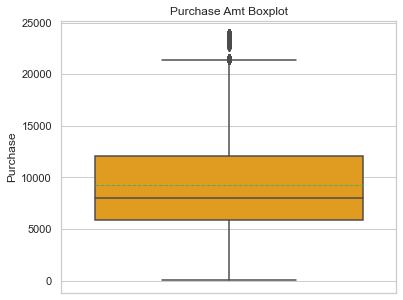

In [44]:
sns.boxplot(y = walmart["Purchase"], showmeans = True, meanline=True, 
            color = "orange").set(title = "Purchase Amt Boxplot")
sns.set(style="whitegrid", rc={'figure.figsize':(6, 5)}) #width, height
plt.show()

<h4> Insights </h4>
<ul>
    <li> The dataset contains data of 550,068 item purchases from walmart. It has 10 columns, 9 of which are categorical and one in discrete, but numerical </li> 
    <li> Dataset doesn't have any null or duplicate records, even value of purchases are not equal </li>
    <li> The mean purchase amount is 9,236 with the std.deviation being 5,023 and median being 8,047. By comparing the Q1 (25%), Q2 (50%), and Q3(75%) along with the std.deviation, we can conclude that <b> ~ 40% of data lies within 1 standard deviation of the mean </b>, and the <b> distribution is right-skewed </b>. The given data is <b> NOT normally distributed </b>. We can confirm these observations using the histogram</li>
    <li> <b> Outliers only make up 0.004% of the data </b>, and do not contain very extreme numbers. Which means they don't have much affect on our data </li>
    <li> Walmart's customers are <b>overwhelmingly male </b></li>
    <li> Walmart's customers' are mostly in the age range of 26-35 and <b>80% of customer's lie between the ages of 18-45 </b></li>
    <li> We cannot infer much about occupation from the given data alone </li>
    <li> Walmart's customers mostly reside in B-category cities, we can't infer much from this data alone </li>
    <li> Walmart's <b>customers don't stay in one city for too long </b>, with more than 45% of customers having stayed in their current city for less than 2 years </li>
    <li> Walmart's customer base is slighty single, but its not a major difference </li>
    <li> Almost <b>~72% </b>of customers shop from the top 3 product categories - Category 5, 1 and 8. </li>
</ul>

<h4> Recommendations </h4>
<ul>
    <li> Since the distribution is a bit right-skewed, Walmart has some high net worth customers, they should create a database of these customers and offer them <b>premium services</b></li>
    <li> Walmart is lagging behind in female customers, they should launch an ad campaign or announce <b>special disounts on feminine products</b> to improve market share </li>
    <li> Walmart can target the working-class age group of 18-45 which has most of its customers by <b>tying up with employers</b> </li>
    <li> Since Walmart's customers keep changing cities frequently, walmart can start a <b>packer and mover service </b>so that customers can move cities easily. Walmart also needs to be present in multiple locations wherever their customers go </li>
    <li> More than 40% of Walmart's customers are married, so there is a huge potential for <b>couple-themed products</b>. Holidays such as marriage anniversaries and Valentines Day can have big sales on these products. </li>
    <li> Walmart should have large inventory of the most in demand products at all times and include these products in Ad campaigns</li>
</ul>

### <center><u>Business Questions using CLT & Bootstrapping</u></center>

<ol>
    <li> Find amount spent per transaction of all 50 million males and females </li>
    <li> Find confidence intervals (99%, 95%, 90%) and distribution of the mean of the expenses by female and male customers. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean</li>
    <li> Check for confidence interval overlap </li>
    <li> Are women spending more money per transaction than men? Why or Why not? </li>
    <li> Results when the same activity is performed for Married vs Unmarried </li>
    <li> Results when the same activity is performed for Age </li>
</ol>

<b><u> Solution: </u></b> We are given that there are 50 million males & females, however we only have the data of 500k (total) people, so to find an approximate population mean with **X% confidence interval, we will use Bootstrapping**. In bootstrapping, we take small, random samples from the given data and plot them to create a histogram. According to CLT, if we do this enough times, we will get a normal distribution for the mean of the data, and by finding the centre of that distribution, we can approximate mean of the population.

In [51]:
def bootstrapping(df, col_name, sample_size, num_samples, bootstrap_stds = False): 
    
    means = []
    stds = []
    sample_size = math.floor(sample_size) #converting float to nearest int
    num_samples = math.floor(num_samples) #converting float to nearest int
    
    for i in range(num_samples):
        sample = df[col_name].sample(n = int(sample_size))
        means.append(sample.mean())
        
        if(bootstrap_stds):
            stds.append(np.std(sample))

    means = np.asarray(means)
    stds = np.asarray(stds)

    return means, stds

In [46]:
df_males = walmart[walmart["Gender"] == "M"]
print("Unique:", "{", df_males["Gender"].unique()[0], "}")
print(df_males["Gender"].value_counts())

Unique: { M }
M    414259
F         0
Name: Gender, dtype: int64


In [52]:
sample_size = 0.001 * len(df_males) 
num_samples = 0.01 * len(df_males)

print("Sample Size:", sample_size, "Num samples: ", num_samples)
male_means, male_stds = bootstrapping(df_males, "Purchase", sample_size, num_samples, bootstrap_stds = True)
print("Means after boostrapping: ", male_means.mean(), male_stds.mean())

Sample Size: 414.259 Num samples:  4142.59
Means after boostrapping:  9439.674500871244 5081.582310059196


In [53]:
print(np.mean(df_males["Purchase"]))
print(male_means.mean() + (1.96 * np.std(male_means)/np.sqrt(num_samples)))
print(male_means.mean() + (1.96 * np.std(male_means)))

9437.526040472265
9447.3065819229
9930.897791558527


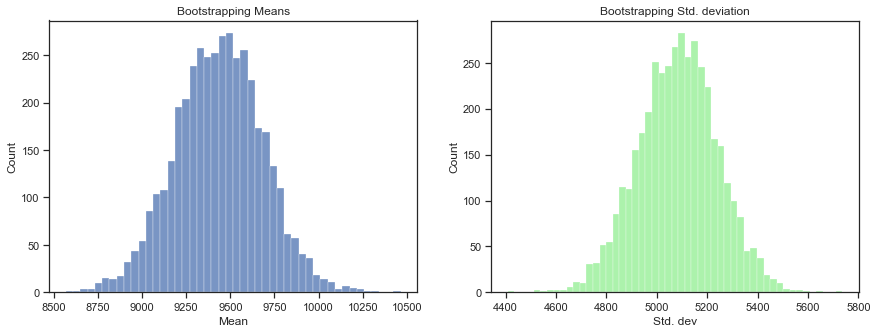

In [34]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 5))
sns.histplot(x = male_means, ax = axs[0]).set(title = "Bootstrapping Means", xlabel = "Mean")
sns.histplot(x = male_stds, color = "lightgreen", ax = axs[1]).set(title = "Bootstrapping Std. deviation", xlabel = "Std. dev")

plt.subplots_adjust(right = 2)
sns.set(style="ticks")
plt.show()

<center><b><u> Checking validity of CLT </u></b></center>

Here, we can see that the histograms of means that we have created are approximately normal. To calulate confidence interval, we need a normal distribution. So, we can try to check if our distribution is **actually** normal or not using the following techniques :

<ol>
    <li><b>QQ Plots</b> : Q–Q plot (quantile-quantile plot) is a probability plot, a graphical method for comparing two probability distributions by plotting their quantiles against each other. The points on a normal QQ Plot follow a straight line, whereas other distributions deviate strongly </li>
    <li> <b>KS Test</b> : Can be used to compare a sample with a reference probability distribution (one-sample K–S test). In essence, the test answers the question "How likely is it that we would see a collection of samples like this if they were drawn from that probability distribution?" </li>
    <li> <b>Box-Cox Transformation Plot</b>: A Box Cox transformation is a transformation of non-normal dependent variables into a normal shape. If we see that the plots are similar, then we can assume that the data was already close to being normally distributed </li>
    <li> There are other, more specific tests such as the Shapiro Wilk test, Anderson - Darling Test </li>

</ol>

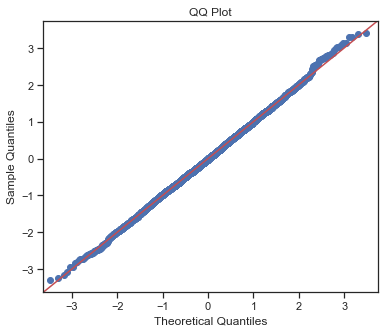

In [222]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import norm
import pylab

means_2d = means.reshape(-1,1) # We need to convert to 2D for standard scaler to work
scaler = StandardScaler().fit(means_2d)
scaled_means = scaler.fit_transform(means_2d) 
scaled_means = scaled_means.flatten()

sm.qqplot(scaled_means, line='45')
plt.title("QQ Plot")
plt.show()

In [211]:
from scipy.stats import kstest

#Ho (Null Hyp): Sample data follows normal distribution
#Ha (Alt Hyp): Sample data is from a different distribution (not normal)

print(kstest(scaled_means, "norm"))

KstestResult(statistic=0.008269227546765956, pvalue=0.9372955681648133)


Thereforem Null Hyp can't be rejected (as p-value is high) and we can say with **93% confidence that Sample data approximately follows normal distribution** 
<br> If we would have taken Confidence Interval = 6% (alpha = 0.94) we could have said that **with ONLY 6% confidence we can say that sample data doesn't follow normal distrubution, and we woud have rejected null hyp (0.94 > 0.93)**

Lambda value used for Transformation: 0.43864700823695396


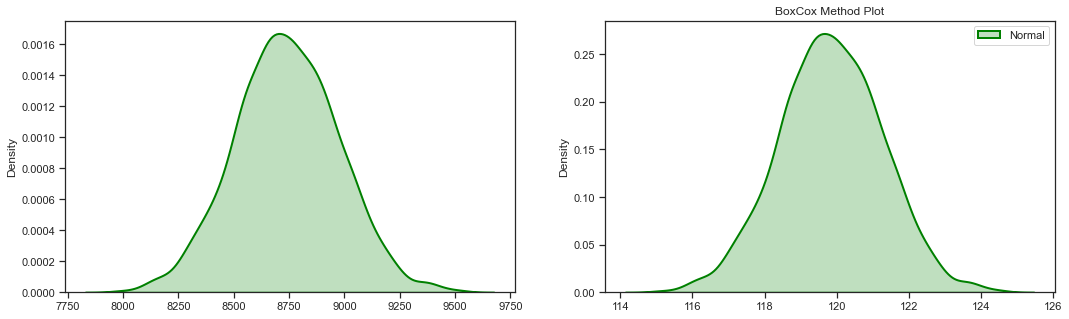

In [226]:
from scipy import stats 

fitted_data, fitted_lambda = stats.boxcox(means)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(means, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
plt.title("BoxCox Method Plot")
plt.subplots_adjust(right = 1.5)

print(f"Lambda value used for Transformation: {fitted_lambda}")
plt.show()

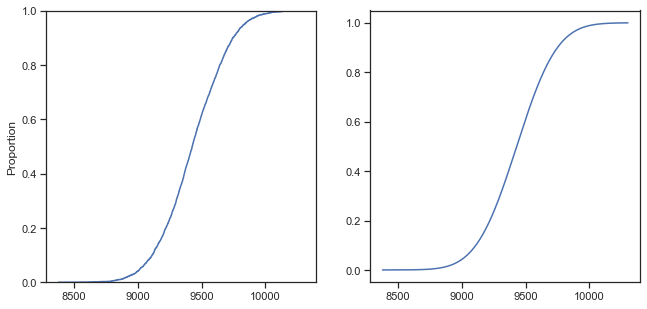

In [206]:
fig, axs = plt.subplots(1, 2)
sns.ecdfplot(x = male_means, ax = axs[0])
axs[1] = plt.plot(np.arange(male_means.min(), male_means.max()+1, 1), 
                  norm.cdf(np.arange(male_means.min(), male_means.max()+1, 1), male_means.mean(), np.std(male_means)))
plt.subplots_adjust(right = 1.5)
plt.grid(False)

<b> Hence, we can conclude that bootstrapping has worked and our distribution is approximately normal (with some extremeities). We will perform the same for female data </b>

In [103]:
df_females = walmart[walmart["Gender"] == "F"]
print("Unique:", "{", df_females["Gender"].unique()[0], "}")
print(df_females["Gender"].value_counts())

Unique: { F }
F    135809
M         0
Name: Gender, dtype: int64


In [185]:
sample_size = 0.001 * len(df_females) 
num_samples = 0.01 * len(df_females)

print(sample_size, num_samples)
fem_means, fem_stds = bootstrapping(df_females, "Purchase", sample_size, num_samples)
print(fem_means[:5])
print(fem_stds[:5])

135.809 1358.09
[8594.16296296 8581.12592593 8659.81481481 8583.11111111 9224.48888889]
[4732.07170699 4649.14000559 4771.34960671 5013.82456468 4857.86235547]


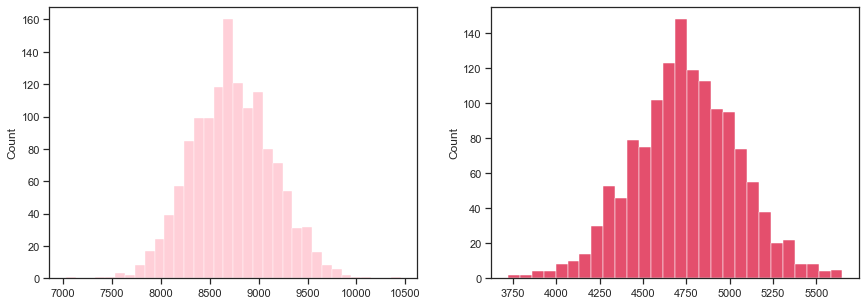

In [179]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 5))
sns.histplot(x = means, color = "pink", ax = axs[0])
sns.histplot(x = stds, color = "crimson", ax = axs[1])

plt.subplots_adjust(right = 2)
sns.set(style="ticks")
plt.show()

<center><b><u> Increasing sample size for females </u></b></center
<br>For females, the data is less and we can see that there are some big peaks in the middle, so we will increase sample size <b>(3x increase)</b> of females to match that of males and check the difference

In [186]:
sample_size = 0.003 * len(df_females) 
num_samples = 0.03 * len(df_females)

print(sample_size, num_samples)
fem_means, fem_stds = bootstrapping(df_females, "Purchase", sample_size, num_samples)
print(fem_means[:5])
print(fem_stds[:5])

407.427 4074.27
[8976.4004914  8673.85503686 8562.7002457  8586.45945946 8804.68550369]
[4956.09211931 4927.90605078 4572.59828594 4649.02255059 4790.38087967]


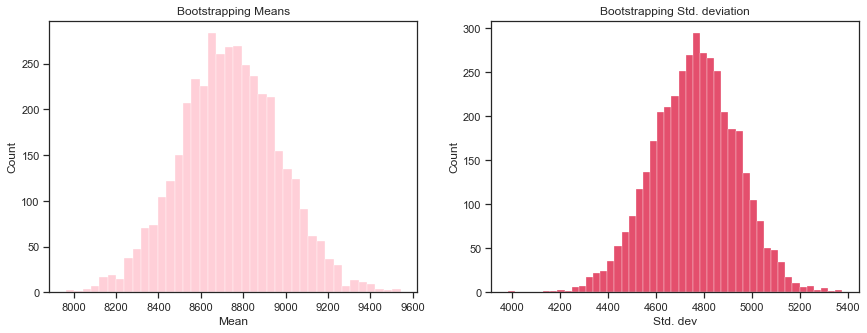

In [183]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 5))
sns.histplot(x = means, color = "pink", ax = axs[0]).set(title = "Bootstrapping Means", xlabel = "Mean")
sns.histplot(x = stds, color = "crimson", ax = axs[1]).set(title = "Bootstrapping Std. deviation", xlabel = "Std. dev")

plt.subplots_adjust(right = 2)
sns.set(style="ticks")
plt.show()

We can clearly see that this curve **looks more normal than the previous one**, therefore, as we increase sample size, the curve becomes more and more normally distributed. This follows the CLT theory

#### Amount spent per transaction (mean):

In [188]:
print("Male avg amount:", male_means.mean())
print("Female std amount:", fem_means.mean())

Male avg amount: 9430.636148608459
Female std amount: 8737.487834400206


**Confidence Interval**
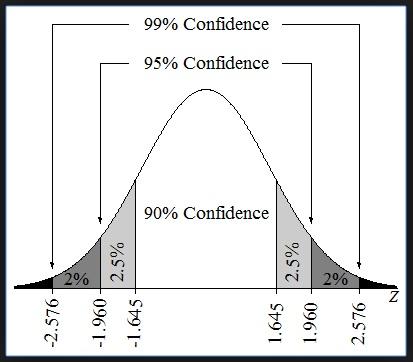

In [212]:
def findCI(pop_mean, ci, std_dev, n): #finds mean value based on given CI assuming normal distribution
    zscore = norm.ppf(ci)
    ci_min = pop_mean - (zscore * std_dev / np.sqrt(n))
    ci_max = pop_mean + (zscore * std_dev / np.sqrt(n))
    
    return ci_min, ci_max

In [230]:
print("Male mean based on given sample data:", df_males["Purchase"].mean())
print("Female mean based on given sample data:", df_females["Purchase"].mean())
print("\nCalculated Population Male mean using Bootstrapping", male_means.mean())
print("Calculated Population Female mean using Bootstrapping", fem_means.mean())

Male mean based on given sample data: 9437.526040472265
Female mean based on given sample data: 8734.565765155476

Calculated Population Male mean using Bootstrapping 9430.636148608459
Calculated Population Female mean using Bootstrapping 8737.487834400206


In [216]:
# 90% CI
print("Male Purchase mean with 90% CI:", findCI(male_means.mean(), 0.9, np.std(male_means), len(male_means)))
print("Female Purchase mean with 90% CI::", findCI(fem_means.mean(), 0.9, np.std(fem_means), len(fem_means)))

Males: (9425.658597992342, 9435.613699224576)
Females: (8732.801203335805, 8742.174465464608)


In [218]:
# 95% CI
print("Male Purchase mean with 95% CI:", findCI(male_means.mean(), 0.95, np.std(male_means), len(male_means)))
print("Female Purchase mean with 95% CI::", findCI(fem_means.mean(), 0.95, np.std(fem_means), len(fem_means)))

Male Purchase mean with 95% CI: (9424.247531556772, 9437.024765660146)
Female Purchase mean with 95% CI:: (8731.47260855076, 8743.503060249654)


In [219]:
# 99% CI
print("Male Purchase mean with 99% CI:", findCI(male_means.mean(), 0.99, np.std(male_means), len(male_means)))
print("Female Purchase mean with 99% CI::", findCI(fem_means.mean(), 0.99, np.std(fem_means), len(fem_means)))

Male Purchase mean with 99% CI: (9421.600605595555, 9439.671691621363)
Female Purchase mean with 99% CI:: (8728.980385690213, 8745.9952831102)


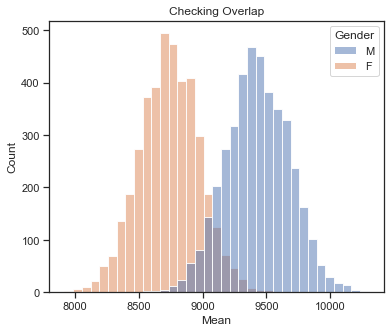

In [256]:
temp_df = pd.DataFrame({"Means" : male_means, "Gender" : ["M"]*len(male_means)})
temp1_df = pd.DataFrame({"Means" : fem_means, "Gender" : ["F"]*len(fem_means)})
temp2_df = pd.concat([temp_df, temp1_df], ignore_index=True)
sns.histplot(data = temp2_df, x = "Means", hue = "Gender").set(title = "Checking Overlap", xlabel = "Mean")
plt.show()

<h4> Insights </h4>
<ul>
    <li> With 99% confidence we can say that the average male customer at Walmart spends Rs.9421 - Rs.9439 </li>
    <li> With 99% confidence we can say that the average female customer at Walmart spends Rs.8728 - Rs.8745 </li>
    <li> There is some overlap between male and female spending - mainly in the 8,700 - 9500 range </li>
    <li> There is no overlap in the confidence intervals of male and female avg spending </li>
</ul>

<h4> Recommendations </h4>
<ul>
    <li> Walmart is lagging behind in female customer numbers and their spending, they should launch an ad campaign targetting women and  announce <b>special disounts on feminine products</b> to improve market share </li>
    <li> Female personel (managers, staff) should be employed in stores so that females feel safe to shop, increased security should be there</li>
    <li> Surveys should be conducted to see why females don't prefer Walmart as much as men do - <b>It maybe because of the wage gap issues, especially in rural areas</b> or <b>men might be going to buy in bulk while women with kids stay at home taking care of the kids</b>. It should be thoroughly inspected </li>
<ul>

<h4><b><u> Bootstrapping for Marital Status </u></b></h4>

In [252]:
df_married = walmart[walmart["Marital_Status"] == "Married"]
df_single = walmart[walmart["Marital_Status"] == "Single"]

sample_size = 0.001 * len(df_married) 
num_samples = 0.01 * len(df_married)
mar_means, mar_stds = bootstrapping(df_married, "Purchase", sample_size, num_samples)

sample_size = 0.001 * len(df_single) 
num_samples = 0.01 * len(df_single)
sing_means, sing_stds = bootstrapping(df_single, "Purchase", sample_size, num_samples)

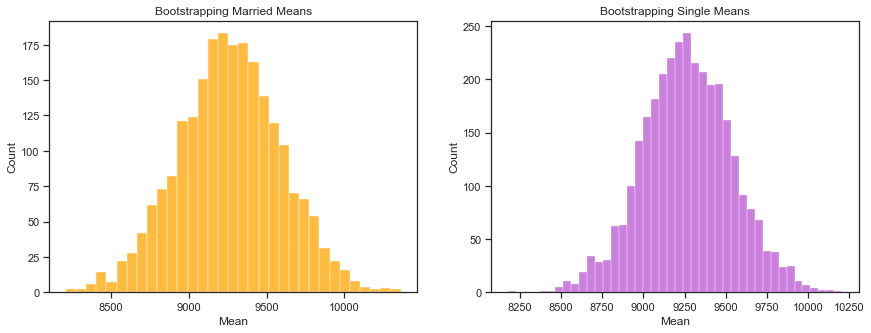

In [254]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 5))
sns.histplot(x = mar_means, color = "orange", ax = axs[0]).set(title = "Bootstrapping Married Means", xlabel = "Mean")
sns.histplot(x = sing_means, color = "mediumorchid", ax = axs[1]).set(title = "Bootstrapping Single Means", xlabel = "Mean")

plt.subplots_adjust(right = 2)
sns.set(style="ticks")
plt.show()

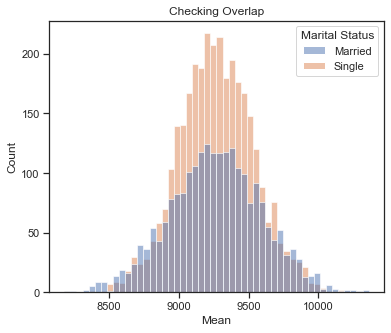

In [257]:
temp_df = pd.DataFrame({"Means" : mar_means, "Marital Status" : ["Married"]*len(mar_means)})
temp1_df = pd.DataFrame({"Means" : sing_means, "Marital Status" : ["Single"]*len(sing_means)})
temp2_df = pd.concat([temp_df, temp1_df], ignore_index=True)
sns.histplot(data = temp2_df, x = "Means", hue = "Marital Status").set(title = "Checking Overlap", xlabel = "Mean")
plt.show()

In [260]:
print("Married mean based on given sample data:", df_married["Purchase"].mean())
print("Single mean based on given sample data:", df_single["Purchase"].mean())
print("\nCalculated Population Married mean using Bootstrapping", mar_means.mean())
print("Calculated Population Single mean using Bootstrapping", sing_means.mean())

# 95% CI
print("\nMarried Purchase mean with 95% CI:", findCI(mar_means.mean(), 0.95, np.std(mar_means), len(mar_means)))
print("Single Purchase mean with 95% CI::", findCI(sing_means.mean(), 0.95, np.std(sing_means), len(sing_means)))

Married mean based on given sample data: 9261.174574082374
Single mean based on given sample data: 9265.907618921507

Calculated Population Married mean using Bootstrapping 9262.423459091582
Calculated Population Single mean using Bootstrapping 9266.69301292361

Married Purchase mean with 95% CI: (9250.991535287143, 9273.855382896021)
Single Purchase mean with 95% CI:: (9258.870756300517, 9274.515269546702)


<h4> Insights </h4>
<ul>
    <li> With 95% confidence we can say that the average married customer at Walmart spends Rs.9250 - Rs.9273 </li>
    <li> With 95% confidence we can say that the average single customer at Walmart spends Rs.9258 - Rs.9275 </li>
    <li> There is huge overlap between the spending of these groups and very little difference in average spending. However, the number of single people exceeds married people</li>
</ul>

<h4> Recommendations </h4>
<ul>
    <li> There is no evidence to support that either group spends more. Hence, Walmart doesn't need to focus on a specific group to increase its sales. Walmart should keep things as it is</li>
<ul>

<h4><b><u> Bootstrapping for Age Bins </u></b></h4>

In [287]:
d = {}
for bin in walmart["Age"].unique():
    d[str(bin)] = walmart[walmart["Age"] == bin]
    sample_size = 100 
    num_samples = 1000
    means, stds = bootstrapping(d[str(bin)], "Purchase", sample_size, num_samples)
    d[str(bin)] = (means, stds)

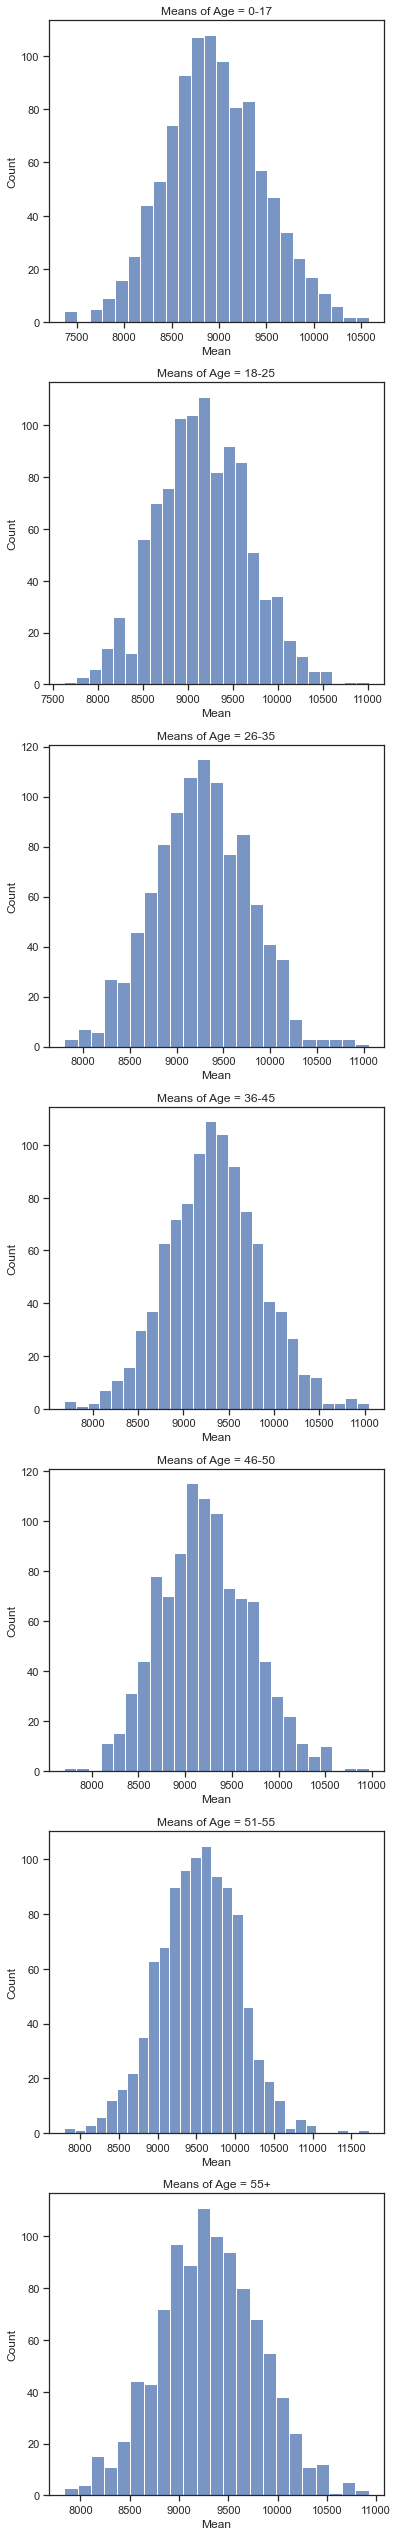

In [285]:
fig, axs = plt.subplots(nrows = 7, figsize = (6, 5))

SortedKeys = list(d.keys())
SortedKeys.sort()
sorted_dict = {i: d[i] for i in SortedKeys}
i = 0
for key in sorted_dict.keys():
    title = "Means of Age = " + key
    sns.histplot(x = sorted_dict[key][0], ax = axs[i]).set(title = title , xlabel = "Mean")
    i = i+1
         
plt.subplots_adjust(top = 7)
sns.set(style="ticks")
plt.show()

In [286]:
for key in sorted_dict.keys(): 
    # 95% CI
    print("\n", key, " Age avg purchase with 95% CI:", findCI(d[key][0].mean(), 0.95, np.std(d[key][0]), len(d[key][0])))


 0-17  Age avg purchase with 95% CI: (8920.751125802179, 8974.42359419782)

 18-25  Age avg purchase with 95% CI: (9141.354380666246, 9193.955879333753)

 26-35  Age avg purchase with 95% CI: (9239.557446417562, 9292.535633582436)

 36-45  Age avg purchase with 95% CI: (9312.305833328524, 9365.535366671475)

 46-50  Age avg purchase with 95% CI: (9193.964214087346, 9244.611045912652)

 51-55  Age avg purchase with 95% CI: (9500.669007289494, 9553.76273271051)

 55+  Age avg purchase with 95% CI: (9281.487259895646, 9334.354440104355)


<h4> Insights </h4>
<ul>
    <li> Average Customer spend keeps increasing with age till we reach age 45+, then it suddenly decreases and bounces back up extremely quick for the age of 51-55</li>
    <li> 0-17 age group has the least spending power by far, and 51-55 has the maximum spending power</li>
</ul>

<h4> Recommendations </h4>
<ul>
    <li> Walmart needs to bring premium products for the age group of 51-55 since they are most likely to spend the highest amount on goods. </li>
    <li> Since 0-17 age spends the least, whenever there is a sale, we can advertise to this age group more so that their spending increases.</li>
    <li> People in the age group of 46-50 spend less for some reason, Walmart needs to increase products which cater to this audience the most</li>
<ul>

In [296]:
grouped = walmart.groupby("User_ID")
grouped["Purchase"].sum().mean()

865016.5917501273

### Links

[Checking distribution and converting it to Gaussian/Normal](https://www.analyticsvidhya.com/blog/2021/05/how-to-transform-features-into-normal-gaussian-distribution/)
<br>[Handling skewed data](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)
<br>[Understanding ecdf functions](https://data.library.virginia.edu/understanding-empirical-cumulative-distribution-functions/)
<br>[68-95-99.7 Rule](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)